<a href="https://colab.research.google.com/github/GenAfrifa/CMP7239/blob/main/Coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

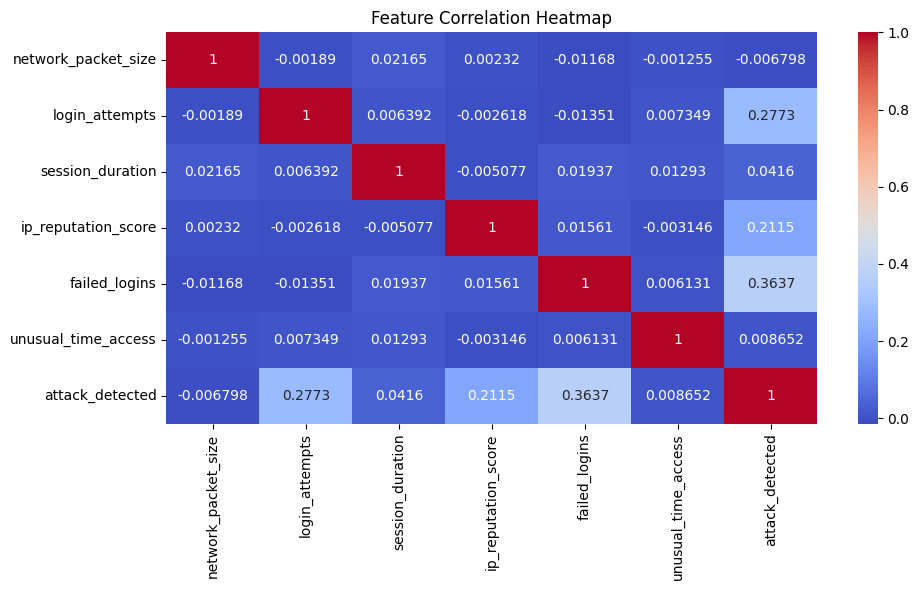

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To load the dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Computation of correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Getting matplotlib figure set up
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4g")

# To display
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3739017793.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attack_detected', palette='colorblind')


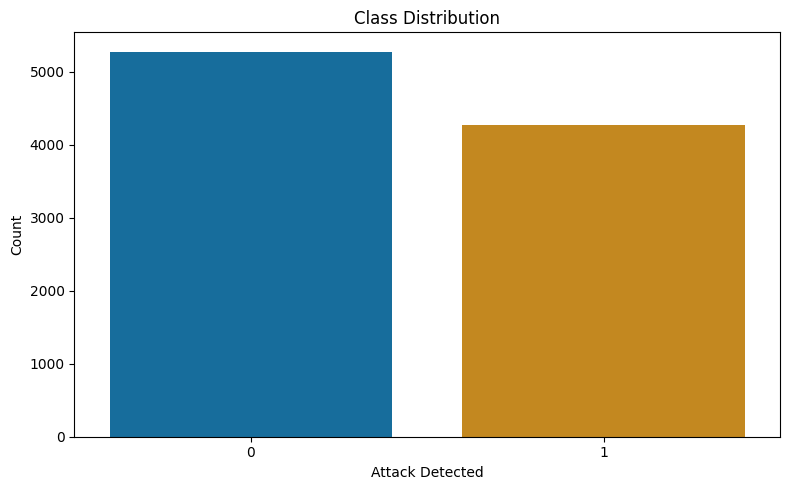

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To load the dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Plotting of class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='attack_detected', palette='colorblind')

# Customize plot
plt.title('Class Distribution')
plt.xlabel('Attack Detected')
plt.ylabel('Count')

# Display plot
plt.tight_layout()
plt.show()


/tmp/ipython-input-4065680713.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attack_detected', y='session_duration', data=df, palette='Set3')


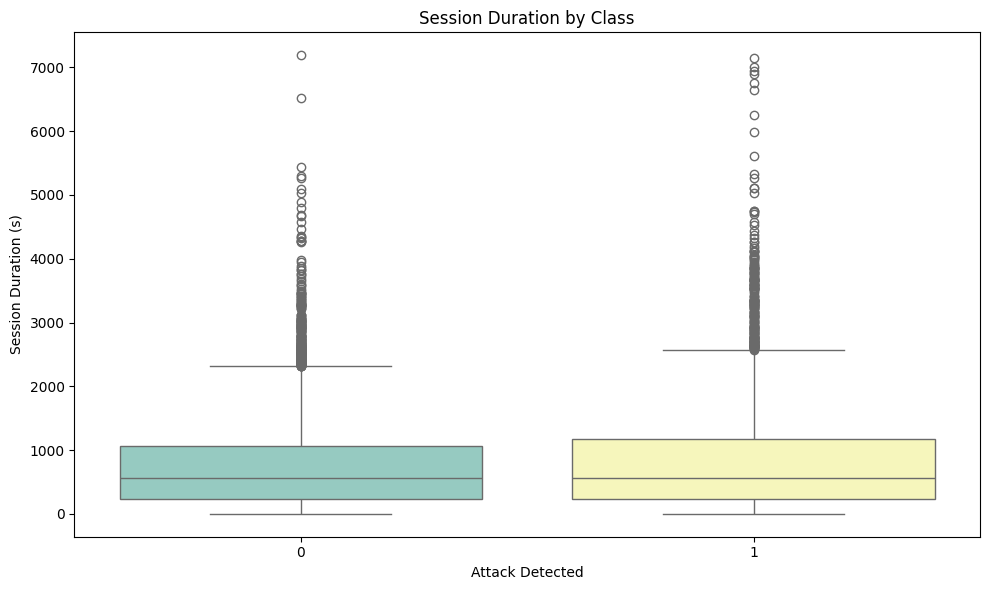

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To load the dataset
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# To create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack_detected', y='session_duration', data=df, palette='Set3')

# Customize the plot
plt.title('Session Duration by Class')
plt.xlabel('Attack Detected')
plt.ylabel('Session Duration (s)')

# Display the plot
plt.tight_layout()
plt.show()



--- Decision Tree ---
Accuracy: 0.812
Precision: 0.79
Recall: 0.79
F1-score: 0.79
ROC-AUC: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1055
           1       0.79      0.79      0.79       853

    accuracy                           0.81      1908
   macro avg       0.81      0.81      0.81      1908
weighted avg       0.81      0.81      0.81      1908



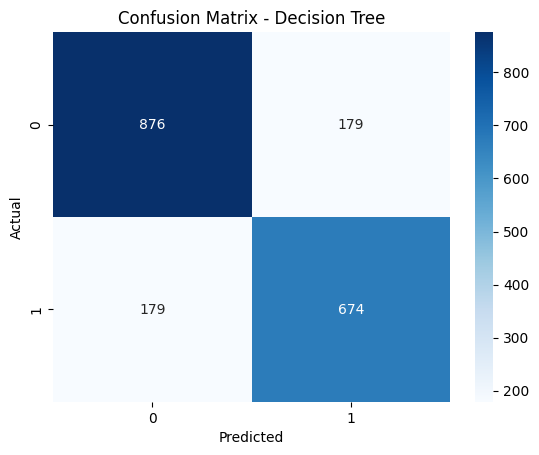

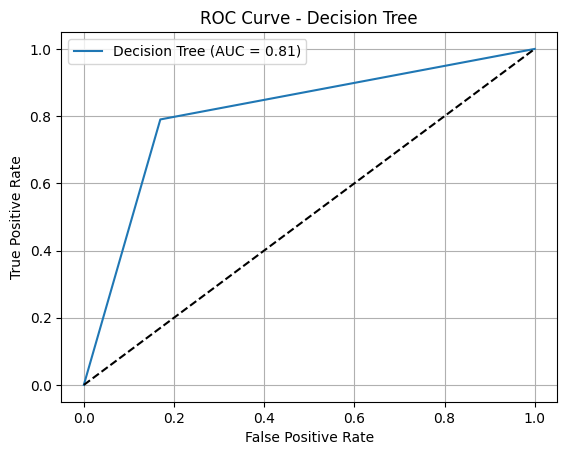


--- Random Forest ---
Accuracy: 0.885
Precision: 0.995
Recall: 0.747
F1-score: 0.853
ROC-AUC: 0.877

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1055
           1       1.00      0.75      0.85       853

    accuracy                           0.89      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.89      0.88      1908



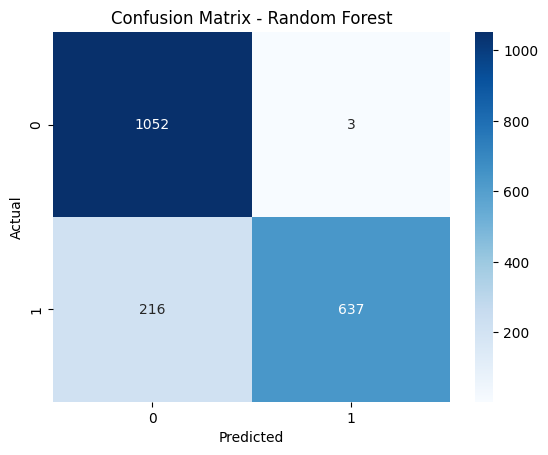

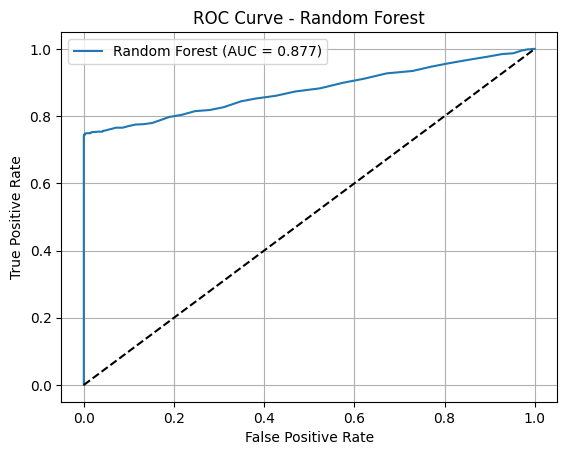


--- Logistic Regression ---
Accuracy: 0.729
Precision: 0.718
Recall: 0.647
F1-score: 0.681
ROC-AUC: 0.787

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.72      0.65      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



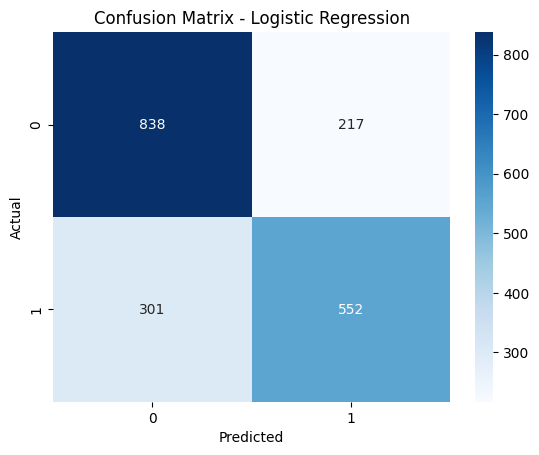

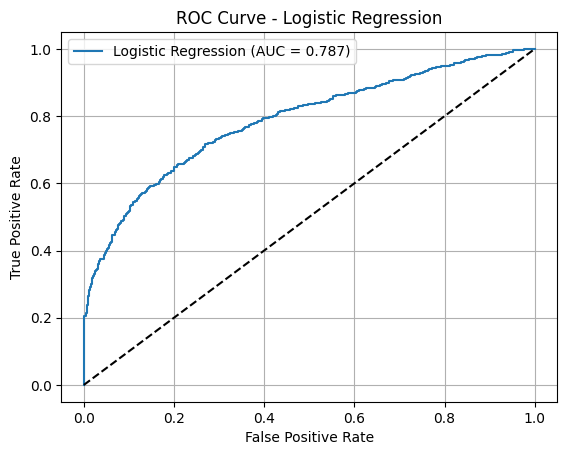

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# To load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")

# Preprocessing
if 'session_id' in df.columns:
    df.drop('session_id', axis=1, inplace=True)


categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


X = df.drop('attack_detected', axis=1)
y = df['attack_detected']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train, test and split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Training Model and Function Evaluation
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    acc = model.score(X_test, y_test)
    precision = np.round(precision_score(y_test, y_pred), 3)
    recall = np.round(recall_score(y_test, y_pred), 3)
    f1 = np.round(f1_score(y_test, y_pred), 3)
    roc = np.round(roc_auc_score(y_test, y_prob), 3)

    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# To import required metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Training and evaluating models
evaluate_model(DecisionTreeClassifier(random_state=42), "Decision Tree")
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")
evaluate_model(LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression")


Evaluating LogisticRegression (scale=True) over k = 1..17 features...
Finished LogisticRegression.
Evaluating RandomForest (scale=False) over k = 1..17 features...
Finished RandomForest.
Evaluating DecisionTree (scale=False) over k = 1..17 features...
Finished DecisionTree.
LogisticRegression best k by F1 = 4 (F1 = 0.6840)
RandomForest best k by F1 = 16 (F1 = 0.8522)
DecisionTree best k by F1 = 17 (F1 = 0.8031)
Saved summary to model_summary_best_k.csv


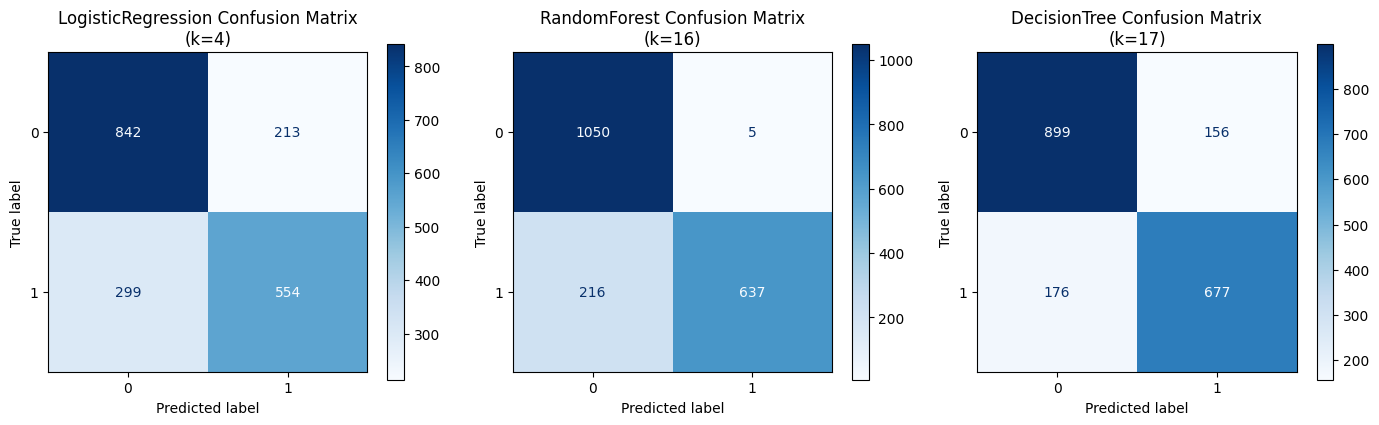

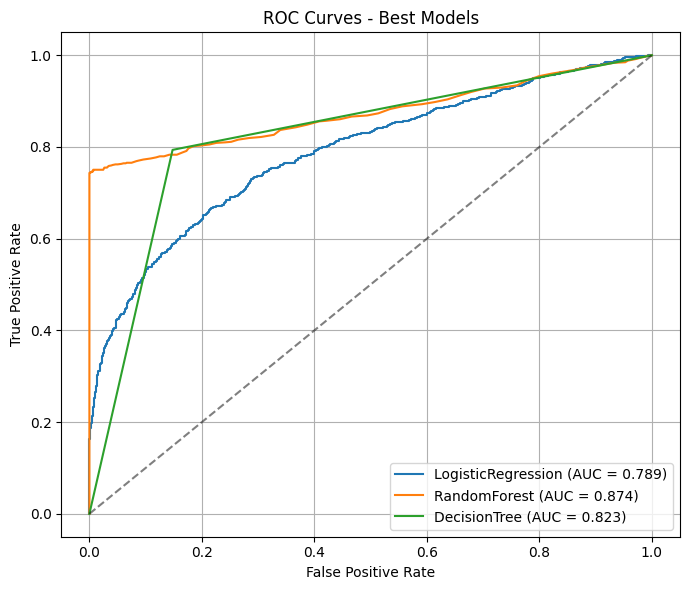

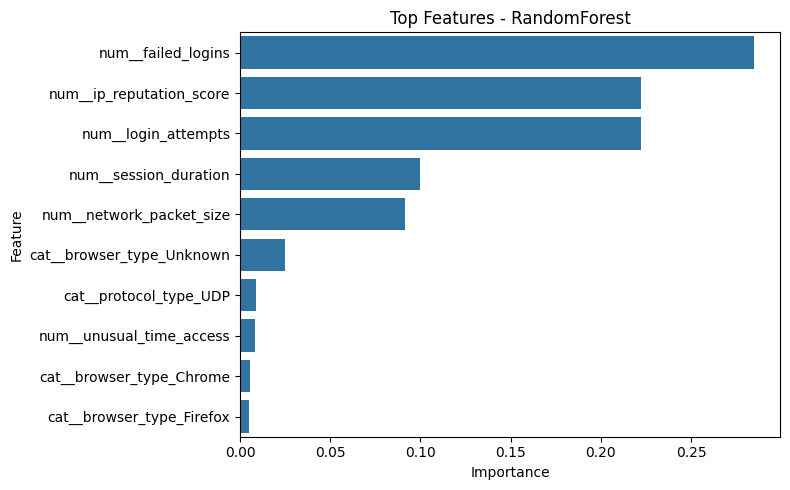

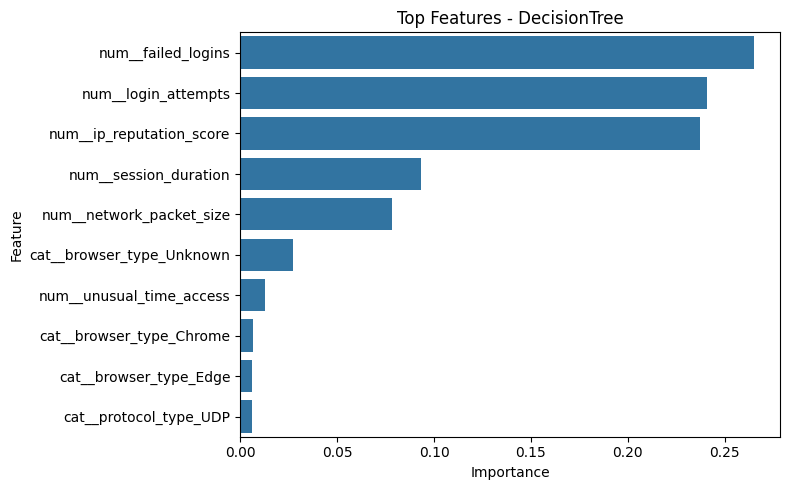

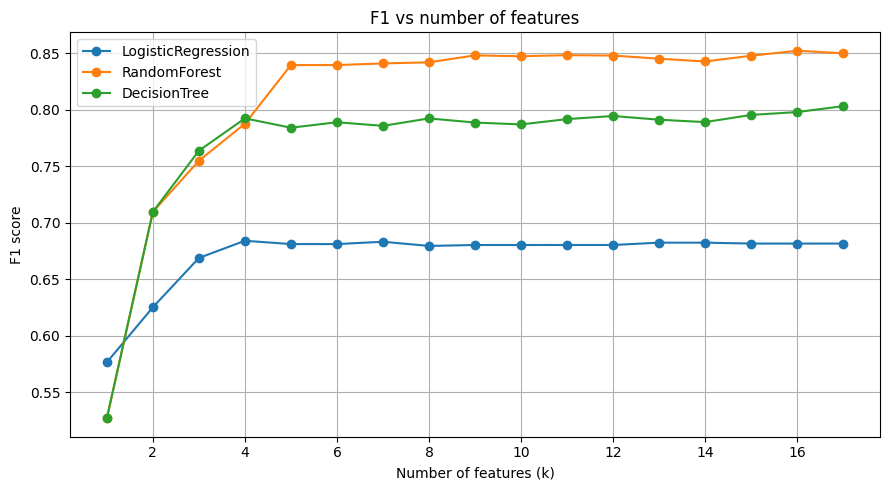

In [5]:
# combined model comparison
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, recall_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)


# To Load data

df = pd.read_csv('Cybersecurity Intrusion Detection.csv')  # adjust path if needed


if 'session_id' in df.columns:
    df = df.drop(columns=['session_id'])


target_col = 'attack_detected'
if target_col not in df.columns:
    raise ValueError(f"Expected target column '{target_col}' in dataset")

X = df.drop(columns=[target_col])
y = df[target_col]

# Identification of column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Fit preprocessor on training data to know final feature count
preprocessor.fit(X_train_raw)

try:
    all_feature_names = preprocessor.get_feature_names_out()
except Exception:

    num_names = numerical_cols
    cat_encoder = preprocessor.named_transformers_['cat']
    cat_names = []
    if hasattr(cat_encoder, 'get_feature_names_out'):
        cat_names = list(cat_encoder.get_feature_names_out(categorical_cols))
    else:

        cat_names = [f"{c}_dummy" for c in categorical_cols]
    all_feature_names = np.array(num_names + cat_names)

num_total_features = len(all_feature_names)




ks = list(range(1, num_total_features + 1))  # 1 .. total features


models = {
    'LogisticRegression': {
        'clf': LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000),
        'scale': True  # use StandardScaler in pipeline
    },
    'RandomForest': {
        'clf': RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
        'scale': False
    },
    'DecisionTree': {
        'clf': DecisionTreeClassifier(random_state=42),
        'scale': False
    }
}


metrics = {}
for name in models:
    metrics[name] = {
        'k': [], 'f1': [], 'accuracy': [], 'precision': [], 'recall': [], 'roc_auc': [], 'time': []
    }


# Evaluation of models over k

for name, cfg in models.items():
    clf = cfg['clf']
    scale = cfg['scale']
    print(f"Evaluating {name} (scale={scale}) over k = 1..{num_total_features} features...")
    for k in ks:
        steps = []
        steps.append(('preprocessor', preprocessor))
        steps.append(('feature_selection', SelectKBest(score_func=f_classif, k=k)))
        if scale:
            steps.append(('scaler', StandardScaler()))
        steps.append(('classifier', clf))
        pipe = Pipeline(steps)

        t0 = time.time()
        pipe.fit(X_train_raw, y_train)
        t1 = time.time()

        y_pred = pipe.predict(X_test_raw)

        try:
            y_score = pipe.predict_proba(X_test_raw)[:, 1]
            roc = roc_auc_score(y_test, y_score)
        except Exception:

            roc = roc_auc_score(y_test, y_pred)

        metrics[name]['k'].append(k)
        metrics[name]['f1'].append(f1_score(y_test, y_pred))
        metrics[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics[name]['precision'].append(precision_score(y_test, y_pred, zero_division=0))
        metrics[name]['recall'].append(recall_score(y_test, y_pred, zero_division=0))
        metrics[name]['roc_auc'].append(roc)
        metrics[name]['time'].append(t1 - t0)

    print(f"Finished {name}.")


# Select best k for each model (by F1) and build final pipelines

best_pipelines = {}
best_results = {}

for name, cfg in models.items():
    f1s = np.array(metrics[name]['f1'])
    best_idx = int(np.argmax(f1s))
    best_k = metrics[name]['k'][best_idx]
    print(f"{name} best k by F1 = {best_k} (F1 = {metrics[name]['f1'][best_idx]:.4f})")

    steps = []
    steps.append(('preprocessor', preprocessor))
    steps.append(('feature_selection', SelectKBest(score_func=f_classif, k=best_k)))
    if cfg['scale']:
        steps.append(('scaler', StandardScaler()))
    steps.append(('classifier', cfg['clf']))
    best_pipe = Pipeline(steps)
    best_pipe.fit(X_train_raw, y_train)
    y_pred = best_pipe.predict(X_test_raw)
    try:
        y_score = best_pipe.predict_proba(X_test_raw)[:, 1]
        roc = roc_auc_score(y_test, y_score)
    except Exception:
        y_score = None
        roc = roc_auc_score(y_test, y_pred)

    best_pipelines[name] = best_pipe
    best_results[name] = {
        'k': best_k,
        'f1': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_score': y_score
    }


summary_df = pd.DataFrame([
    {'Model': name,
     'Best_k': best_results[name]['k'],
     'F1': best_results[name]['f1'],
     'Accuracy': best_results[name]['accuracy'],
     'Precision': best_results[name]['precision'],
     'Recall': best_results[name]['recall'],
     'ROC_AUC': best_results[name]['roc_auc']}
    for name in best_results
])
summary_df.to_csv('model_summary_best_k.csv', index=False)
print("Saved summary to model_summary_best_k.csv")


#Plotting confusion matrices

plt.figure(figsize=(14, 4))
for i, (name, res) in enumerate(best_results.items(), start=1):
    ax = plt.subplot(1, 3, i)
    cm = confusion_matrix(res['y_test'], res['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f"{name} Confusion Matrix\n(k={res['k']})")
plt.tight_layout()
plt.show()


#Plotting ROC curves

plt.figure(figsize=(7, 6))
for name, res in best_results.items():
    if res['y_score'] is not None:
        fpr, tpr, _ = roc_curve(res['y_test'], res['y_score'])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.3f})")
    else:

        cm = confusion_matrix(res['y_test'], res['y_pred'])
        tn, fp, fn, tp = cm.ravel()
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        plt.plot([0, fpr, 1], [0, tpr, 1], label=f"{name} (AUC ≈ {res['roc_auc']:.3f})", linestyle='--')

plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Best Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#Top 10 Feature importances for tree models

def get_selected_feature_names(pipe):


    try:
        feat_names = pipe.named_steps['preprocessor'].get_feature_names_out()
    except Exception:

        feat_names = all_feature_names

    selector = pipe.named_steps['feature_selection']
    sel_idx = selector.get_support(indices=True)
    return feat_names[sel_idx]

for name in ['RandomForest', 'DecisionTree']:
    if name in best_pipelines:
        clf = best_pipelines[name].named_steps['classifier']
        try:
            importances = clf.feature_importances_
            feature_names = get_selected_feature_names(best_pipelines[name])

            idx_sorted = np.argsort(importances)[::-1]
            top_idx = idx_sorted[:10]
            top_features = feature_names[top_idx]
            top_importances = importances[top_idx]

            plt.figure(figsize=(8, 5))
            sns.barplot(x=top_importances, y=top_features)
            plt.title(f"Top Features - {name}")
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Could not extract importances for {name}: {e}")


plt.figure(figsize=(9,5))
for name in metrics:
    plt.plot(metrics[name]['k'], metrics[name]['f1'], marker='o', label=name)
plt.xlabel('Number of features (k)')
plt.ylabel('F1 score')
plt.title('F1 vs number of features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print()


--- Decision Tree ---
Accuracy: 0.826
Precision: 0.813
Recall: 0.794
F1-score: 0.803
ROC-AUC: 0.823


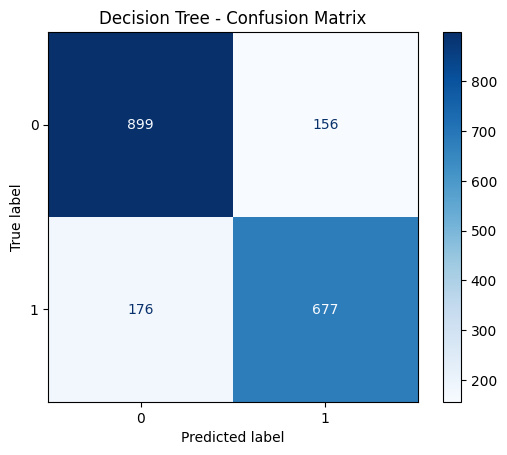

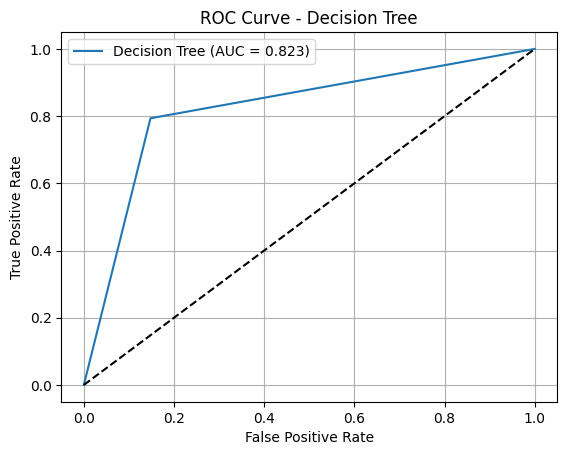

Successful


In [6]:
# Decision Tree

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")
if 'session_id' in df.columns:
    df = df.drop(columns=['session_id'])

X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Pipeline
dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Metrics
print("\n--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(dt_model, "decision_tree.pkl")
print("Successful")



--- Random Forest ---
Accuracy: 0.882
Precision: 0.986
Recall: 0.747
F1-score: 0.850
ROC-AUC: 0.877


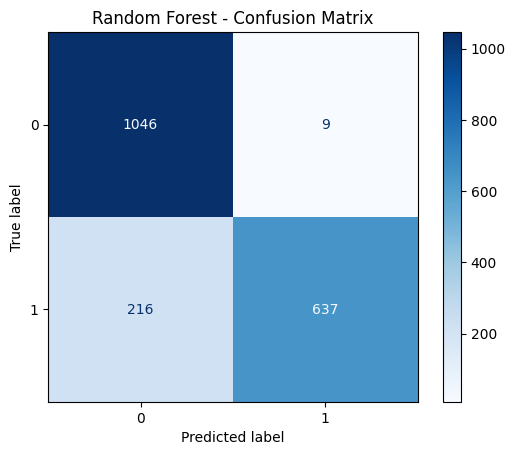

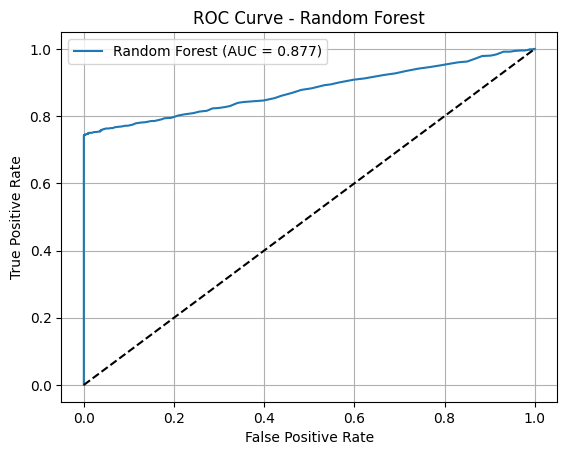

Successful


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")
if 'session_id' in df.columns:
    df = df.drop(columns=['session_id'])

X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Pipeline
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# Train
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Metrics
print("\n--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(rf_model, "random_forest.pkl")
print("Successful")



--- Logistic Regression ---
Accuracy: 0.729
Precision: 0.717
Recall: 0.648
F1-score: 0.681
ROC-AUC: 0.788


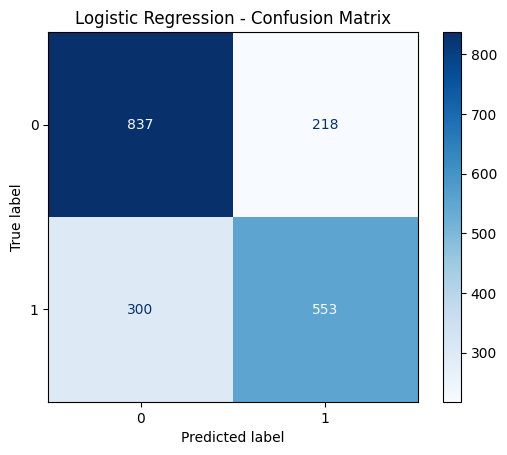

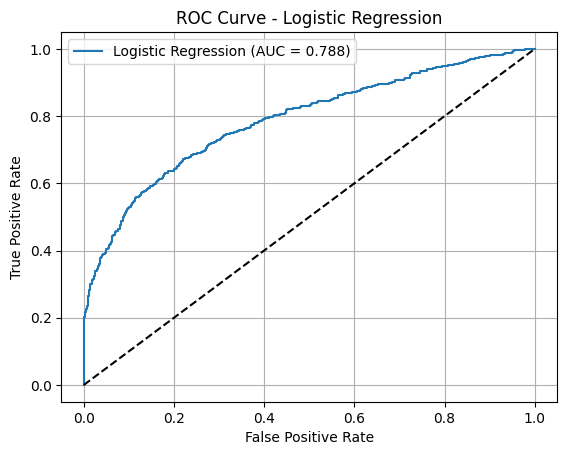

Successful


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

# Load dataset
df = pd.read_csv("Cybersecurity Intrusion Detection.csv")
if 'session_id' in df.columns:
    df = df.drop(columns=['session_id'])

X = df.drop(columns=['attack_detected'])
y = df['attack_detected']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# Pipeline
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42))
])

# Train
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Metrics
print("\n--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()

# Save model
joblib.dump(lr_model, "logistic_regression.pkl")
print("Successful")
